In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as tfds
import numpy as np

In [2]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.fashion_mnist.load_data()

In [3]:
np.unique(y_test_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
num_class = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

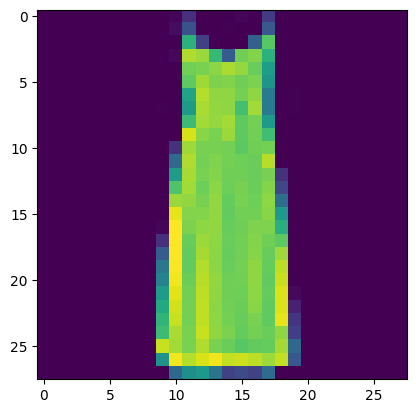

In [5]:
plt.imshow(x_test_raw[13])

In [6]:
x_test_raw.shape

(10000, 28, 28)

In [7]:
x_train = tf.reshape(x_train_raw, shape=[60000,784])
x_test = tf.reshape(x_test_raw, shape=[10000,784])

In [8]:
x_train.shape

TensorShape([60000, 784])

In [9]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255



In [10]:
x_train.shape

TensorShape([60000, 784])

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=784),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [18]:
model.fit(
    x_train, y_train,
    epochs=10,
    steps_per_epoch=25,
    validation_data=(x_test, y_test)
)

Epoch 1/10
25/25 [==============================] - 1s 36ms/step - loss: 1.6814 - accuracy: 0.4148 - val_loss: 1.1668 - val_accuracy: 0.6028
Epoch 2/10
25/25 [==============================] - 1s 31ms/step - loss: 0.9304 - accuracy: 0.6880 - val_loss: 0.7861 - val_accuracy: 0.7188
Epoch 3/10
25/25 [==============================] - 1s 42ms/step - loss: 0.7030 - accuracy: 0.7560 - val_loss: 0.6685 - val_accuracy: 0.7665
Epoch 4/10
25/25 [==============================] - 1s 45ms/step - loss: 0.6137 - accuracy: 0.7908 - val_loss: 0.6060 - val_accuracy: 0.7930
Epoch 5/10
25/25 [==============================] - 1s 35ms/step - loss: 0.5605 - accuracy: 0.8102 - val_loss: 0.5627 - val_accuracy: 0.8037
Epoch 6/10
25/25 [==============================] - 1s 30ms/step - loss: 0.5233 - accuracy: 0.8227 - val_loss: 0.5394 - val_accuracy: 0.8084
Epoch 7/10
25/25 [==============================] - 1s 32ms/step - loss: 0.4974 - accuracy: 0.8310 - val_loss: 0.5137 - val_accuracy: 0.8210
Epoch 8/10
25

In [19]:
model.save('model/model.h5')
model.save('model/model1')

INFO:tensorflow:Assets written to: model/model1\assets


In [22]:
model_save = tf.keras.models.load_model('model/model.h5')

In [23]:
hasil = model_save.predict(x_test)

313/313 [==============================] - 0s 941us/step


In [24]:
hasil.shape

(10000, 10)